# Discrete (and Mixed) Functions:

ECP is primarily designed to solve continuous optimization problems, where the variables are real-valued and can take any value within a specified range. However, in many real-world optimization problems, we encounter discrete variables (integer-valued) or mixed-variable problems, where some variables are continuous, while others are discrete.

To handle such scenarios, the ECP framework can be extended to accommodate discrete variables. This can be achieved by discretizing the discrete variables within the specified range directly in the objective function. For mixed-variable problems, continuous variables are treated in the standard manner, while discrete variables are rounded to integer values to ensure they are treated as discrete entities during optimization.

Below is an example of how this can be implemented in the function class:

```
class Function:
  def __call__(self, x: np.ndarray = None) -> float:

    # Discretize x by casting to integers
    x = np.round(x).astype(int)

    # Ensure that x values are within the bounds
    x = np.clip(x, self.bounds[:, 0], self.bounds[:, 1])

    reward = ...
```



In [20]:
import os

# Clone ECP repository if not already cloned
if not os.path.exists("ECP"):
    os.system("git clone https://github.com/fouratifares/ECP.git")

In [ ]:
cd ECP

In [22]:
from optimizers.ECP import ECP
import numpy as np
import matplotlib.pyplot as plt

# Running ECP on Your Own Function

In [33]:
import numpy as np

class Function:
    def __init__(self) -> None:
        # Bounds for integer values
        self.bounds = np.array([(-10, 10), (-10, 10)])
        self.dimensions = 2

    def __call__(self, x: np.ndarray = None) -> float:
        if x is not None:
            # Ensure the input is a numpy array of integers
            if len(x) != self.dimensions:
                raise ValueError(f"Input must have {self.dimensions} dimensions.")

            # Discretize x by casting to integers
            x = np.round(x).astype(int)

            # Ensure that x values are within the bounds
            x = np.clip(x, self.bounds[:, 0], self.bounds[:, 1])

        # Function
        reward = 20 * np.exp(-0.2 * np.sqrt(0.5 * ((x[0] + 1) ** 2 + (x[1] + 1) ** 2))) + np.exp(
            0.5 * (np.cos(2 * np.pi * (x[0] + 1)) + np.cos(2 * np.pi * (x[1] + 1)))) - np.exp(1) - 20

        return reward

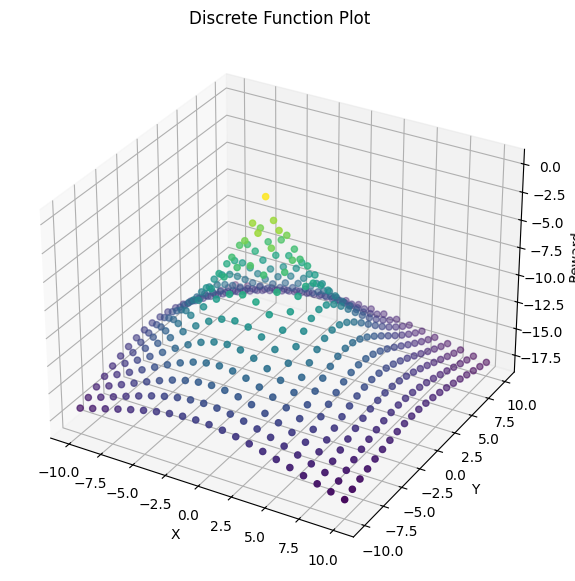

In [34]:
# Create a meshgrid of discrete x values
x_vals = np.arange(-10, 11, 1)  # Discretize the range from -10 to 10 with steps of 1
y_vals = np.arange(-10, 11, 1)
X, Y = np.meshgrid(x_vals, y_vals)

# Initialize the function
func = Function()

# Calculate the function values on the grid
Z = np.zeros_like(X, dtype=float)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

# Plot the discrete function using a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Reward')
ax.set_title('Discrete Function Plot')

plt.show()

The Global Search is Completed
Best Point: [-1 -1]
Maximum Value: 0.0




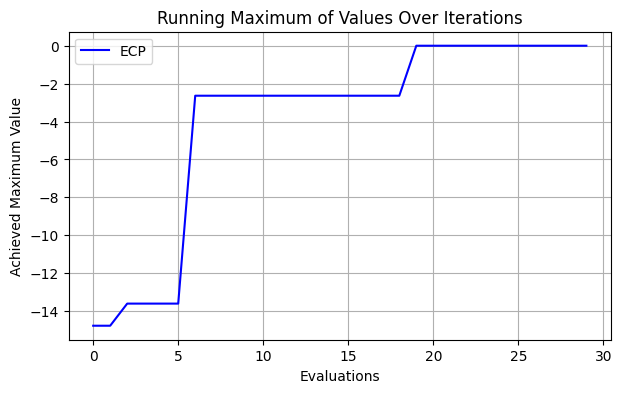

In [35]:
f = Function()
points, values, epsilons = ECP(f, n = 30)

# Retrieve the corresponding point
best_point = np.round(points[np.argmax(values)]).astype(int)

print("The Global Search is Completed")
print("Best Point:", best_point)
print("Maximum Value:", max(values))
print("\n")

# Compute running maximum
running_max = np.maximum.accumulate(values)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(running_max, label="ECP", color="blue")
plt.xlabel("Evaluations")
plt.ylabel("Achieved Maximum Value")
plt.title("Running Maximum of Values Over Iterations")
plt.legend()
plt.grid()
plt.show()